In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import math 
import numpy as np 
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
df = pd.read_csv(r"D:\Sem 5\ML LABS\DataSets\cancer_patient.csv")
df.drop(columns=['index', 'Patient Id'],inplace=True)

In [3]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(848)

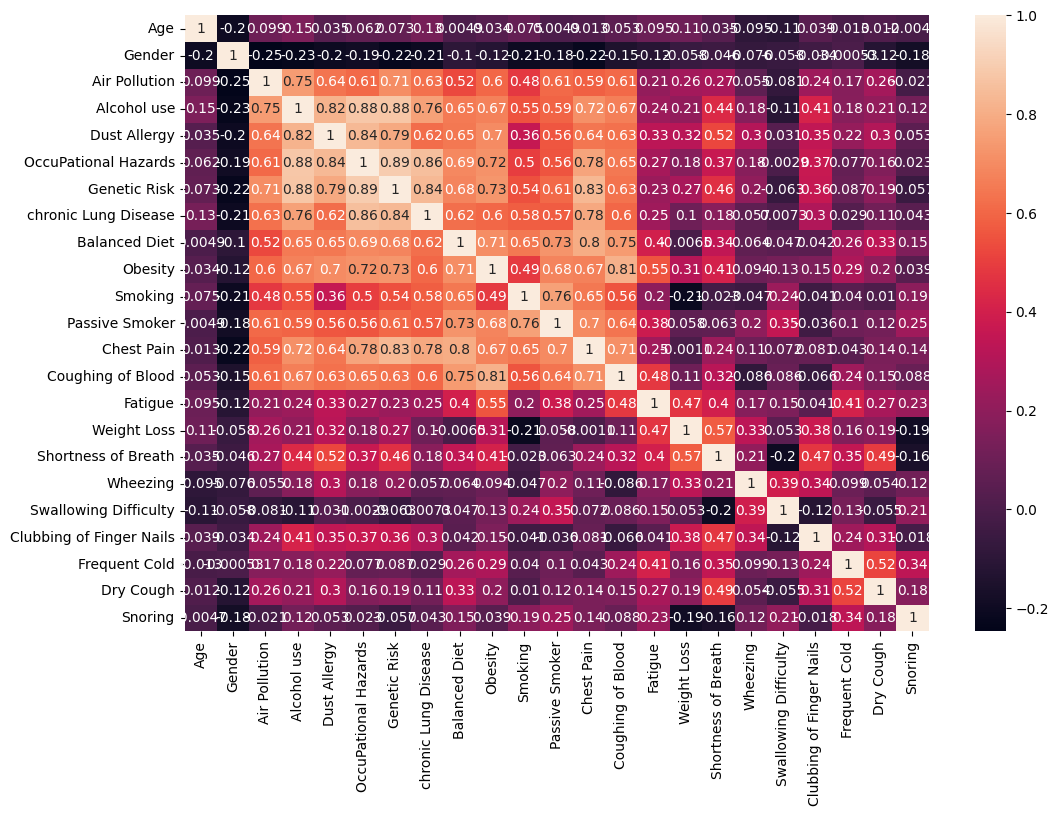

In [5]:
plt.figure(figsize=(12,8))
snb.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [6]:
display(df)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
Y = df.pop('Level')
X = df
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,y_encoded,train_size=0.8,random_state=0,stratify=y_encoded)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,train_size=0.7,random_state=0,stratify=Y_train)

In [9]:
clf = KNeighborsClassifier(n_neighbors=7)

clf.fit(X_train, Y_train)
    
train_acc = accuracy_score(Y_train, clf.predict(X_train))
val_acc = accuracy_score(Y_val, clf.predict(X_val))
test_acc = accuracy_score(Y_test, clf.predict(X_test))
    

In [10]:
print(f"Traning Accuracy : {train_acc} , Testing Accuracy : {test_acc}, Validation Accuracy : {val_acc}")

Traning Accuracy : 1.0 , Testing Accuracy : 1.0, Validation Accuracy : 1.0


In [11]:
metrics = ['euclidean', 'manhattan', 'minkowski']
results = {}
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
  knn.fit(X_train, Y_train)
  
  acc_train = accuracy_score(Y_train, knn.predict(X_train))
  acc_val = accuracy_score(Y_val, knn.predict(X_val))
  acc_test = accuracy_score(Y_test, knn.predict(X_test))
  results[metric] = [acc_train, acc_val,acc_test]

pd.DataFrame(columns=metrics, index=['Training', 'Validation','Testing'], data=results)

,euclidean,manhattan,minkowski
Training,1.0,1.0,1.0
Validation,1.0,1.0,1.0
Testing,1.0,1.0,1.0
